# **Harmonic Osillator using Leapfrog Algorithm**

In [1]:
import matplotlib.pyplot as plt
from numpy import*


#defining paraneters
N = 10000
t = linspace(0,100,N)
dt = t[1] - t[0]

# function
def inte(F,x0,v0,gamma):#defining the integrating function
    # arrays are allocated and filled with zeros
    x = zeros(N)
    v = zeros(N)
    E = zeros(N)
    # initial conditions
    x[0] = x0
    v[0] = v0

    # integration function
    f1 = 1.0 - 0.5*gamma*dt
    f2 = 1.0/(1.0 + 0.5*gamma*dt)
    
    #loop
    for i in range(N-1):
         v[i + 1] = f1*f2*v[i] - f2*dt*x[i] + f2*dt*F[i]
         x[i + 1] = x[i] + dt*v[i + 1]
         E[i] += 0.5*(x[i]**2 + ((v[i] + v[i+1])/2.0)**2)
    
    E[-1] = 0.5*(x[-1]**2 + v[-1]**2)
    
    # asking the code to spitout what we need
    return x,v,E

## CASE 1: Harmonic Oscillator with F=0, Varying $\gamma$
#### The harmonic oscillator without a driving force and varying value of damping constant, $\gamma$

In [2]:
# numerical integration
F = zeros(N)
x1,v1,E1 = inte(F,0.0,1.0,0.0) # x0 = 0.0, v0 = 1.0, gamma = 0.0 that is no damping
x2,v2,E2 = inte(F,0.0,1.0,0.01) # x0 = 0.0, v0 = 1.0, gamma = 0.01 very little damping
x3,v3,E3 = inte(F,0.0,1.0,0.1) # x0 = 0.0, v0 = 1.0, gamma = 0.5 comparitively some greater damping factor
x4,v4,E4 = inte(F,0.0,1.0,1.0) # x0 = 0.0, v0 = 1.0, gamma = 1.0 comparitively some greater damping factor
x5,v5,E5 = inte(F,0.0,1.0,10.0) # x0 = 0.0, v0 = 1.0, gamma = 10.0 comparitively some greater damping factor


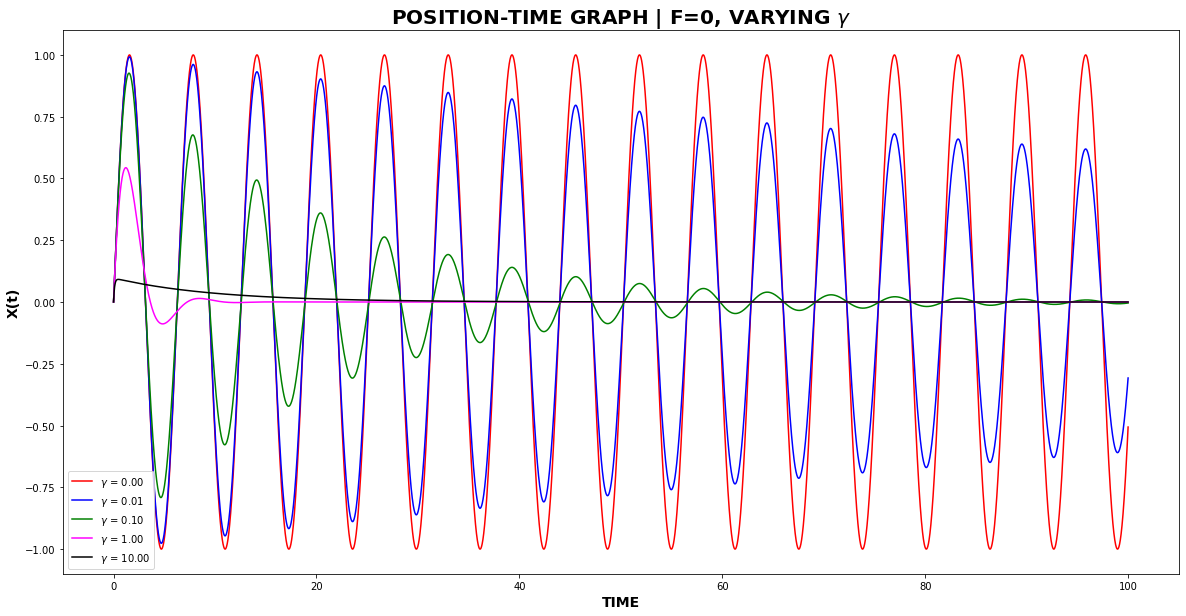

In [3]:
#plotting the position time graph
plt.figure(figsize=(20,10))
plt.plot(t,x1, color="red", label="$\gamma$ = 0.00")
plt.plot(t,x2, color="blue", label="$\gamma$ = 0.01")
plt.plot(t,x3, color="green", label="$\gamma$ = 0.10")
plt.plot(t,x4, color="magenta" , label="$\gamma$ = 1.00")
plt.plot(t,x5, color="black" , label="$\gamma$ = 10.00")
plt.title("POSITION-TIME GRAPH | F=0, VARYING $\gamma$",fontweight='bold',fontsize='20')
plt.xlabel("TIME",fontweight='bold',fontsize='14')
plt.ylabel("X(t)",fontweight='bold',fontsize='14')
#plt.rcParams["figure.figsize"]=16,10
plt.legend()
plt.show()

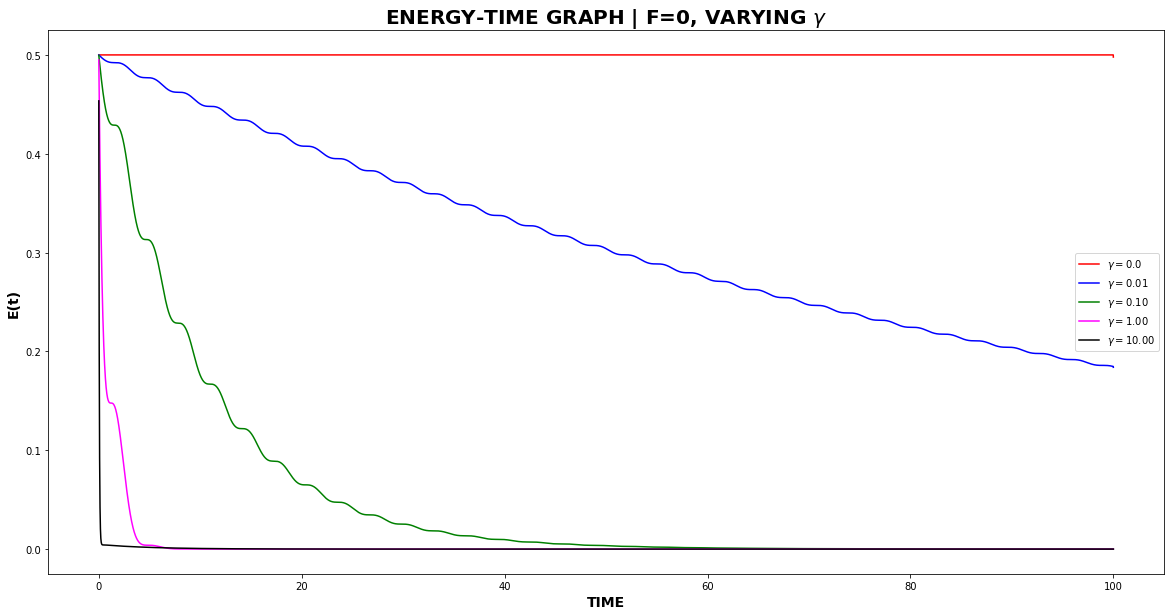

In [4]:
#plotting the Energy time graph
plt.figure(figsize=(20,10))
plt.plot(t,E1, color="red", label=r"$\gamma = 0.0$")
plt.plot(t,E2, color="blue", label=r"$\gamma = 0.01$")
plt.plot(t,E3, color="green", label=r"$\gamma = 0.10$")
plt.plot(t,E4, color="magenta", label=r"$\gamma = 1.00$")
plt.plot(t,E5, color="black", label=r"$\gamma = 10.00$")
plt.xlabel("TIME",fontweight='bold',fontsize='14')
plt.ylabel("E(t)",fontweight='bold',fontsize='14')
plt.title("ENERGY-TIME GRAPH | F=0, VARYING $\gamma$",fontweight='bold',fontsize='20')
#plt.rcParams["figure.figsize"]=16,10
plt.legend()
plt.show()

From the above graph it can be seen that;
* With no damping constant that is $\gamma = 0$ the energy is conserved.
* When there is some value of damping constant that is  $\gamma \ne 0$ then
    * Energy is not conserved but decreases with time.
    * Greater the value of damping constant, higher the energy-drop.
    * Now look at the curve properly, you may notice the irregularities in the curve, this is because the energy is associated with the damping force, basically because it is proportional to the velocity term, $\left(v=\frac{dx}{dt}\right)$
        * Since the velocity term oscillates periodically thus the irregular curves.
        * At the point velocity term is zero or atleast tends to be zero, energy remains constant.

## CASE 2: Driven Harmonic Oscillator with $\gamma =0$, Varying F
#### Keeping amplitude and duration of force constant and varying the angular frequency with negligible damping, that is, $\gamma = 0$

In [5]:
#defining the force
def force(f0,t,w,T):
          return f0*cos(w*t)*exp(-t**2/T**2) 
#f0 is initial force
#t is time
#w is omega, that is, natural angular frequency
#T is the time period

In [6]:
# allocating the arrys and filling them with zeros
F1 = zeros(N)
F2 = zeros(N)
F3 = zeros(N)
F4 = zeros(N)
F5 = zeros(N)

#loop
#defining the force with same amplitude and duration but with different natural angular frequency
for i in range(N-1):
    F1[i] = force(1.0,t[i] - 20.0,1.0,10.0) #natural angular frequency, 𝜔0
    F2[i] = force(1.0,t[i] - 20.0,0.9,10.0) #0.9𝜔0
    F3[i] = force(1.0,t[i] - 20.0,0.8,10.0) #0.8𝜔0
    F4[i] = force(1.0,t[i] - 20.0,0.7,10.0) #0.7𝜔0
    F5[i] = force(1.0,t[i] - 20.0,0.6,10.0) #0.6𝜔0
    
    
x1,v1,E1 = inte(F1,0.0,0.0,0.0)
x2,v2,E2 = inte(F2,0.0,0.0,0.0)
x3,v3,E3 = inte(F3,0.0,0.0,0.0)
x4,v4,E4 = inte(F4,0.0,0.0,0.0)
x5,v5,E5 = inte(F5,0.0,0.0,0.0)

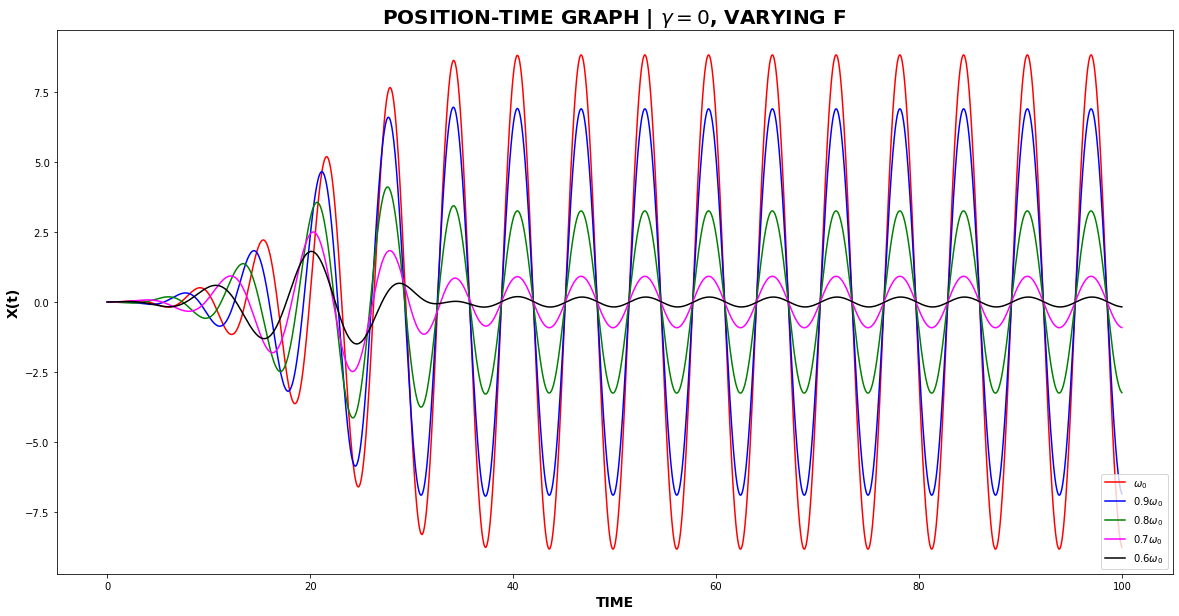

In [7]:
#plotting the position time graph
plt.figure(figsize=(20,10))
plt.plot(t,x1, color="red", label="$\omega_0$")
plt.plot(t,x2, color="blue", label="0.9$\omega_0$")
plt.plot(t,x3, color="green", label="0.8$\omega_0$")
plt.plot(t,x4, color="magenta", label="0.7$\omega_0$")
plt.plot(t,x5, color="black", label="$0.6\omega_0$")
plt.xlabel("TIME",fontweight='bold',fontsize='14')
plt.ylabel("X(t)",fontweight='bold',fontsize='14')
plt.title("POSITION-TIME GRAPH | $\gamma =0$, VARYING F",fontweight='bold',fontsize='20')
plt.rcParams["legend.loc"] = 'lower right'
plt.legend()
plt.show()

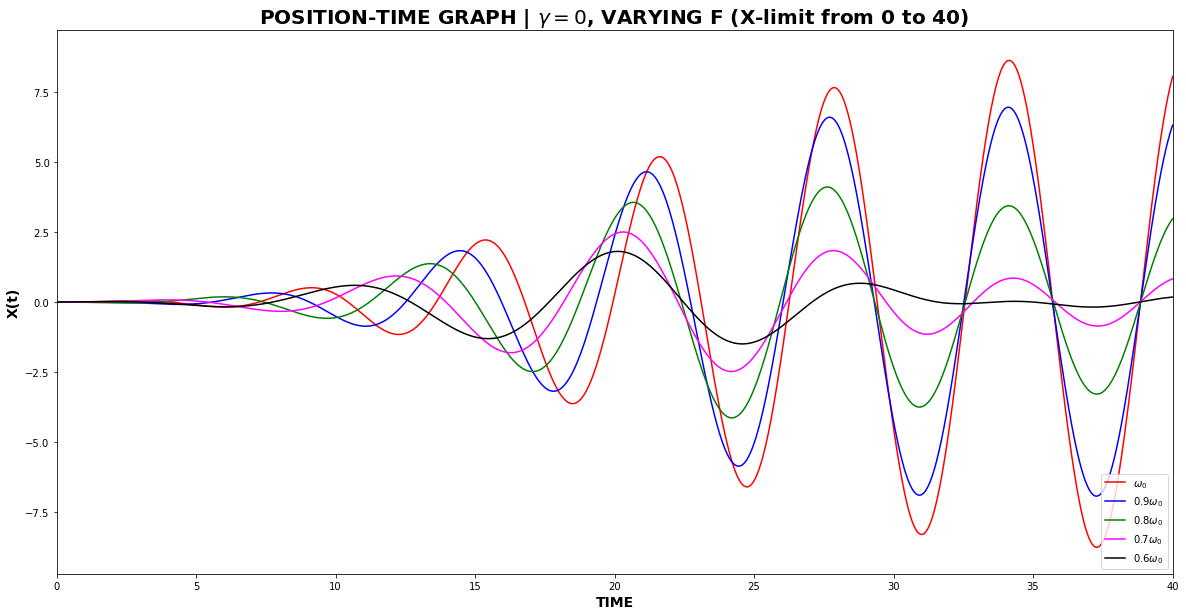

In [8]:
#plotting the position time graph(x-limit 0 to 40)
#here the distinction of curve when angular frequency is varying can be observed
plt.figure(figsize=(20,10))
plt.plot(t,x1, color="red", label="$\omega_0$")
plt.plot(t,x2, color="blue", label="0.9$\omega_0$")
plt.plot(t,x3, color="green", label="0.8$\omega_0$")
plt.plot(t,x4, color="magenta", label="0.7$\omega_0$")
plt.plot(t,x5, color="black", label="$0.6\omega_0$")
plt.xlabel("TIME",fontweight='bold',fontsize='14')
plt.ylabel("X(t)",fontweight='bold',fontsize='14')
plt.title("POSITION-TIME GRAPH | $\gamma =0$, VARYING F (X-limit from 0 to 40)",fontweight='bold',fontsize='20')
plt.rcParams["legend.loc"] = 'lower right'
plt.xlim(0,40)
plt.legend()
plt.show()

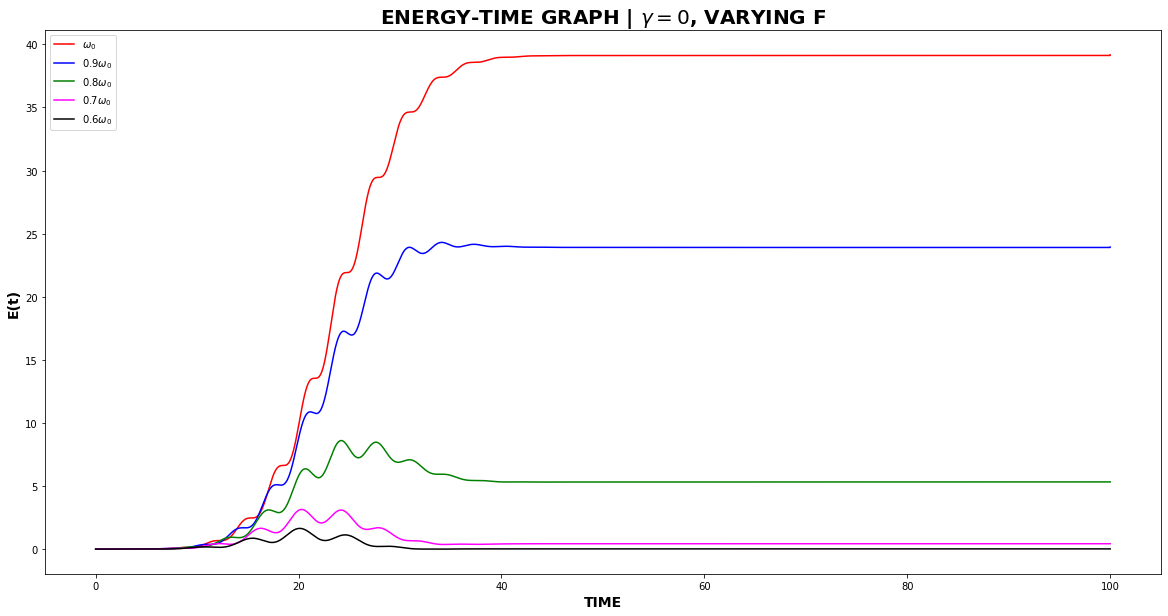

In [9]:
#plotting the Energy time graph
plt.figure(figsize=(20,10))
plt.plot(t,E1,label="$\omega_0$", color="red")
plt.plot(t,E2,label="0.9$\omega_0$", color="blue")
plt.plot(t,E3,label="0.8$\omega_0$", color="green")
plt.plot(t,E4,label="0.7$\omega_0$", color="magenta")
plt.plot(t,E5,label="0.6$\omega_0$", color="black")
plt.ylabel("E(t)",fontweight='bold',fontsize='14')
plt.xlabel("TIME",fontweight='bold',fontsize='14')
plt.title("ENERGY-TIME GRAPH | $\gamma =0$, VARYING F",fontweight='bold',fontsize='20')
plt.rcParams["legend.loc"] = 'upper left'
plt.legend()
plt.show()

From the above graph it can be observed: oscillator driven close to its natural angular frequency $\omega_0$ gains energy from the driving the force and since the damping is negated ,i.e., $\gamma=0$ the straight line which indiates conservation of energy.

## CASE 2: Driven Harmonic Oscillator with Constant F, Varying $\gamma$

#### Keeping the Force constant (that is constant amplitude and duration with angular frequency = natural angular frequency, $\omega_0$) with varying  value of damping constant, $\gamma$

In [10]:
# driving force is constant that is F1 (that is force with )
#but here value of 𝛾 is variable as well
#defining some value of damping constant below- 𝛾=0,0.01,0.1,1,10
x1,v1,E1 = inte(F1,0.0,0.0,0.0)
x2,v2,E2 = inte(F1,0.0,0.0,0.01)
x3,v3,E3 = inte(F1,0.0,0.0,0.1)
x4,v4,E4 = inte(F1,0.0,0.0,1.0)
x5,v5,E5 = inte(F1,0.0,0.0,10.0)

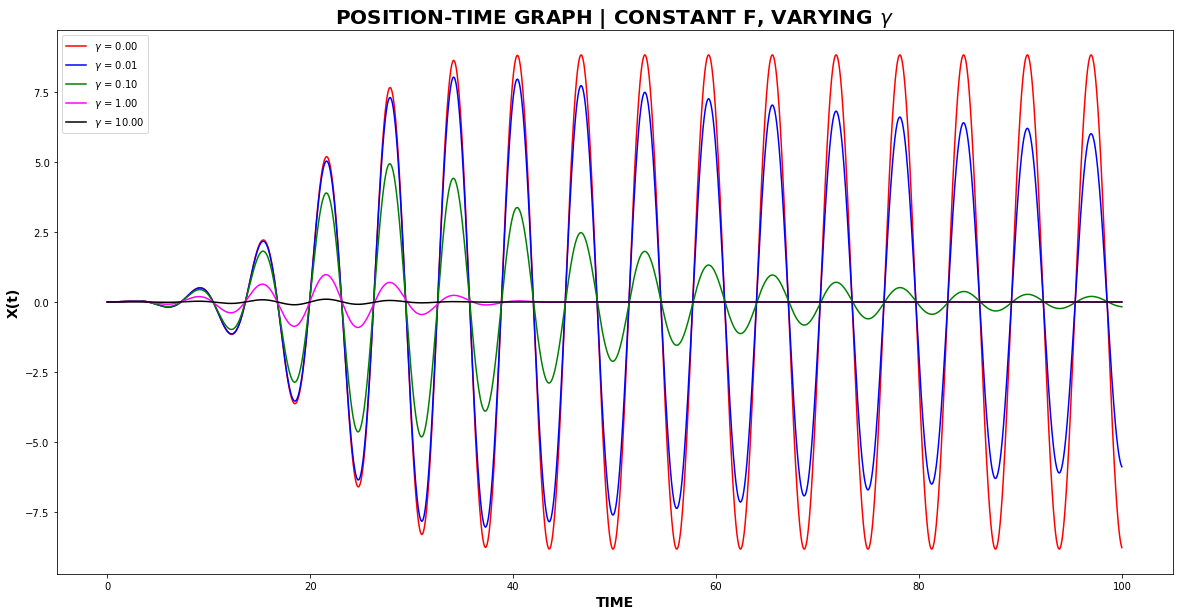

In [11]:
#plotting the position time graph
plt.figure(figsize=(20,10))
plt.plot(t,x1, color="red", label="$\gamma$ = 0.00")
plt.plot(t,x2, color="blue", label="$\gamma$ = 0.01")
plt.plot(t,x3, color="green", label="$\gamma$ = 0.10")
plt.plot(t,x4, color="magenta" , label="$\gamma$ = 1.00")
plt.plot(t,x5, color="black" , label="$\gamma$ = 10.00")
plt.title("POSITION-TIME GRAPH | CONSTANT F, VARYING $\gamma$",fontweight='bold',fontsize='20')
plt.xlabel("TIME",fontweight='bold',fontsize='14')
plt.ylabel("X(t)",fontweight='bold',fontsize='14')
#plt.rcParams["figure.figsize"]=15,5
plt.legend()
plt.show()

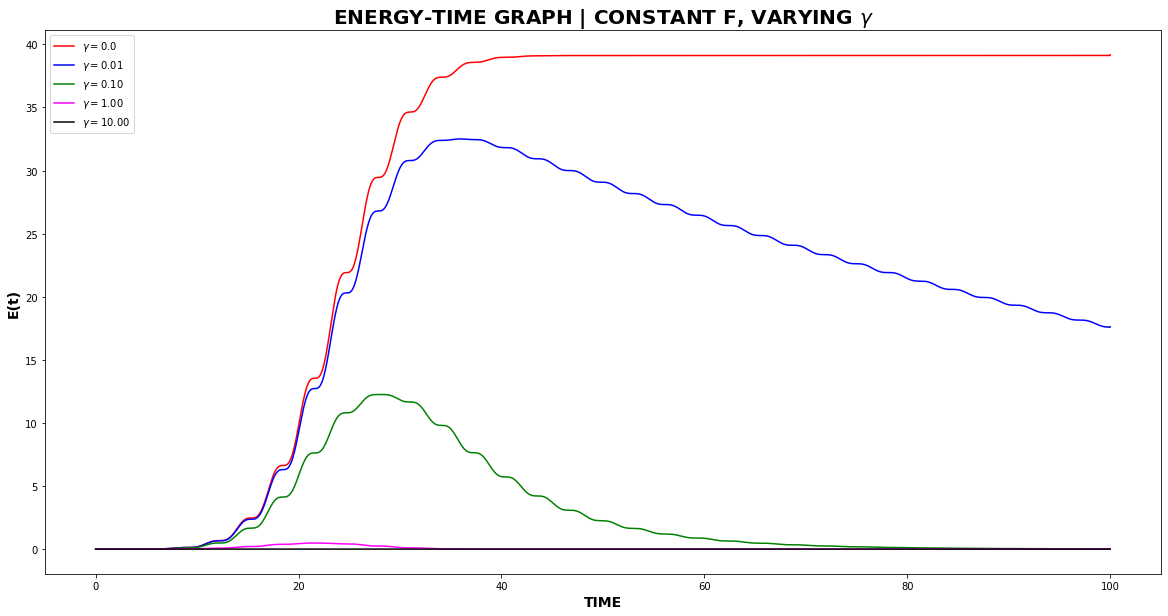

In [12]:
#plotting the Energy time graph
plt.figure(figsize=(20,10))
plt.plot(t,E1, color="red", label=r"$\gamma = 0.0$")
plt.plot(t,E2, color="blue", label=r"$\gamma = 0.01$")
plt.plot(t,E3, color="green", label=r"$\gamma = 0.10$")
plt.plot(t,E4, color="magenta", label=r"$\gamma = 1.00$")
plt.plot(t,E5, color="black", label=r"$\gamma = 10.00$")
plt.xlabel("TIME",fontweight='bold',fontsize='14')
plt.ylabel("E(t)",fontweight='bold',fontsize='14')
plt.title("ENERGY-TIME GRAPH | CONSTANT F, VARYING $\gamma$",fontweight='bold',fontsize='20')
#plt.rcParams["figure.figsize"]=15,5
plt.legend()
plt.show()

So from above graph it can be observed;
* When damping is negated, i.e., $\gamma=0$ depicted by red curve shows energy is conserved via straight line.
* When damping is applied, i.e., $\gamma \ne 0$ the driven harmonic oscillators gain energy when driven but then also loose some due to damping.
* Stronger the damping, greater and faster the energy is lost (at very high damping the energy is lost almost immediately after the driving force stops.)